## Modules to be Imported

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

## Loading the csv data

In [2]:
unclean_data = pd.read_csv('gender_classifier.csv', engine  = 'python')
unclean_data.shape

(20050, 26)

## Finding the rows in which gender is not unknown

In [3]:
gender_unknown = unclean_data[pd.isna(unclean_data['gender'])]
gender_unknown.shape

(97, 26)

## Removing the rows from the data in which gender is not specified

In [4]:
df = unclean_data[pd.notnull(unclean_data['gender'])]
print(df.shape)
df

(19953, 26)


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,‰ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
5,815719231,False,finalized,3,10/27/15 1:47,female,1.0000,yes,1.0,3/11/10 18:14,...,https://pbs.twimg.com/profile_images/656336865...,0,0,"Ive seen people on the train with lamps, chair...",NaN,20036,10/26/15 12:40,6.587300e+17,New York Gritty,Central Time (US & Canada)
6,815719232,False,finalized,3,10/27/15 1:57,brand,1.0000,yes,1.0,4/24/08 13:03,...,https://pbs.twimg.com/profile_images/528547133...,0,0,@BpackEngineer Thank you for your patience whi...,NaN,13354,10/26/15 12:40,6.587300e+17,Worldwide,Eastern Time (US & Canada)
7,815719233,False,finalized,3,10/26/15 23:48,male,1.0000,yes,1.0,12/3/12 21:54,...,https://pbs.twimg.com/profile_images/508875440...,0,C0DEED,Gala Bingo clubs bought for å£241m: The UK's l...,NaN,112117,10/26/15 12:40,6.587300e+17,NaN,NaN
8,815719234,False,finalized,3,10/27/15 1:52,female,1.0000,yes,1.0,9/8/15 4:50,...,https://pbs.twimg.com/profile_images/658670112...,0,0,@_Aphmau_ the pic defines all mcd fangirls/fan...,NaN,482,10/26/15 12:40,6.587300e+17,NaN,NaN
9,815719235,False,finalized,3,10/27/15 1:49,female,1.0000,yes,1.0,5/13/11 3:32,...,https://pbs.twimg.com/profile_images/513327289...,0,FFFFFF,@Evielady just how lovely is the tree this yea...,NaN,26085,10/26/15 12:40,6.587300e+17,"Nottingham, England.",Amsterdam


In [5]:
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

## Number of Not Null Values in the DataFrame

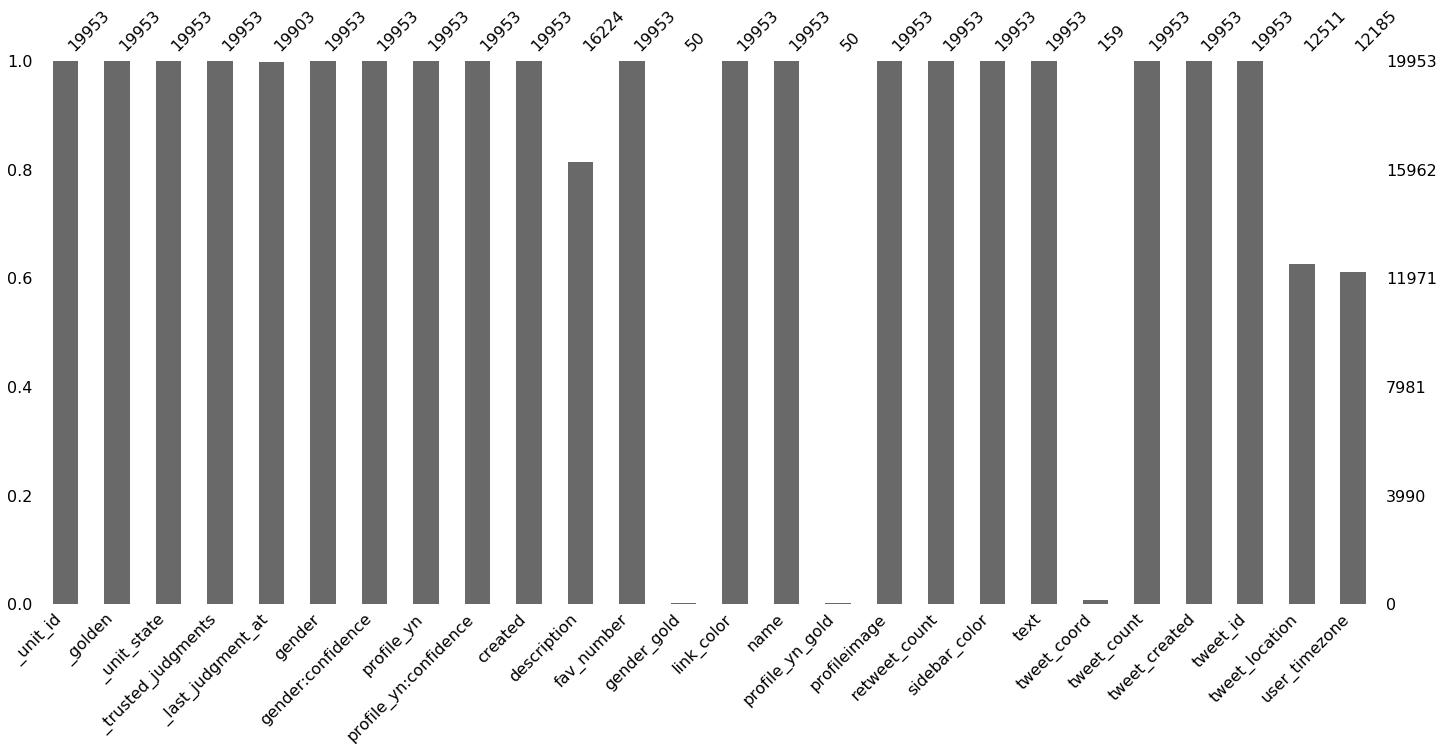

In [6]:
msno.bar(df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19953 entries, 0 to 20049
Data columns (total 26 columns):
_unit_id                 19953 non-null int64
_golden                  19953 non-null bool
_unit_state              19953 non-null object
_trusted_judgments       19953 non-null int64
_last_judgment_at        19903 non-null object
gender                   19953 non-null object
gender:confidence        19953 non-null float64
profile_yn               19953 non-null object
profile_yn:confidence    19953 non-null float64
created                  19953 non-null object
description              16224 non-null object
fav_number               19953 non-null int64
gender_gold              50 non-null object
link_color               19953 non-null object
name                     19953 non-null object
profile_yn_gold          50 non-null object
profileimage             19953 non-null object
retweet_count            19953 non-null int64
sidebar_color            19953 non-null object
text    

# Using Tweet text for Training Data

In [8]:
# Dictinoary to store the models accuracy with their names
models_accuracy = {}

## Converting the tweet text into CSR Matrix

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df['text'])
X_train, X_test, y_train, y_test = train_test_split(X_counts,df['gender'], random_state = 0)

## MultinomialNB Model

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
mnb_model = MultinomialNB().fit(X_train,y_train)
y_pred = mnb_model.predict(X_test)
print(accuracy_score(y_test,y_pred))
models_accuracy['MultinomialNB'] = accuracy_score(y_test,y_pred)

0.5355782721988375


## SVC Model

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
svm_model_linear = SVC(C = 1).fit(X_train,y_train)
svm_predictions = svm_model_linear.predict(X_test)
svm_accuracy = svm_model_linear.score(X_test, y_test)
svm_cm = confusion_matrix(y_test,svm_predictions)
print(svm_accuracy)
models_accuracy['SVC'] = accuracy_score(y_test,svm_predictions)

C:\Users\vikastiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.3401483263178994


## DecisionTreeClassifier Model

In [12]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
dtc_predictions = dtc_model.predict(X_test)
print(accuracy_score(y_test,dtc_predictions))
models_accuracy['DecisionTreeClassifier'] = accuracy_score(y_test,dtc_predictions)

0.4764481860092203


## RandomForestClassifier Model

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=0).fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print(accuracy_score(y_test,rf_predictions))
models_accuracy['RandomForestClassifier'] = accuracy_score(y_test,rf_predictions)

C:\Users\vikastiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.4988975746642614


## Models with their accuracy

Model  Accuracy using Tweet text
MultinomialNB : 53.56 %
RandomForestClassifier : 49.89 %
DecisionTreeClassifier : 47.64 %
SVC : 34.01 %


(0, 1)

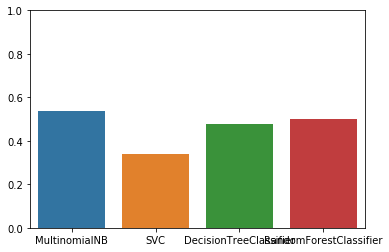

In [14]:
print('Model  Accuracy using Tweet text')
for name,accuracy in sorted(models_accuracy.items(), key = lambda x:x[1], reverse = True):
    print('{0} : {1:.2f} %'.format(name,accuracy*100))
sns.barplot(list(models_accuracy.keys()), list(models_accuracy.values()))
plt.ylim(0,1)

# Using Sidebar Color and Link Color for training data

In [15]:
models_accuracy_colors = {}

## Removing the rows with invalid color codes

(19953,) (19953, 2)
{0, 1, 2, 3}


C:\Users\vikastiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


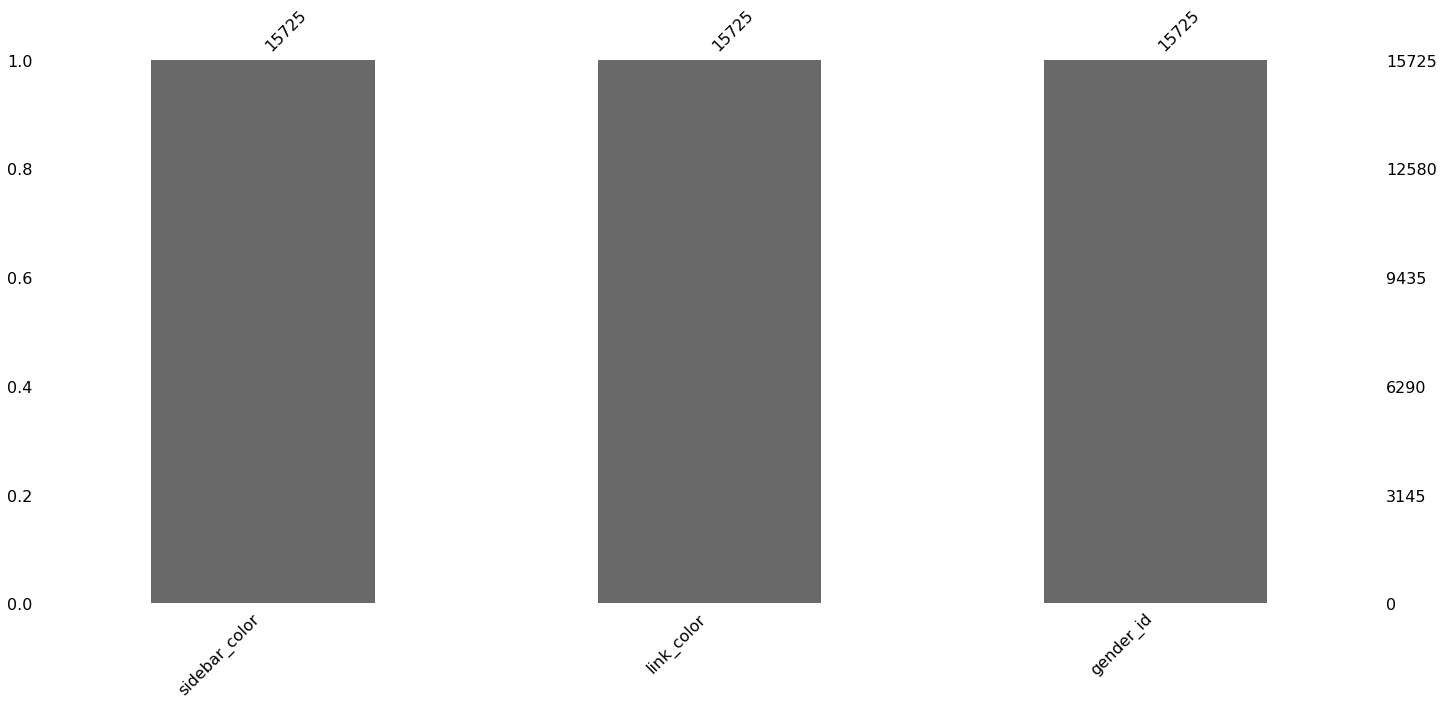

In [16]:
features = ['sidebar_color','link_color']
target = 'gender_id'
color_df = df[features]
color_df['gender_id'] = df['gender'].factorize()[0]
print(color_df[target].shape,color_df[features].shape)
print(set(color_df['gender_id']))
color_df = color_df[color_df['sidebar_color'] != '0']
color_df = color_df[color_df['link_color'] != '0']
msno.bar(color_df)

## Finding the length of the color codes in order to remove invalid data

In [17]:
color_df['length1'] = color_df['sidebar_color'].apply(lambda x: len(x) ==  6)
color_df = color_df[color_df['length1']]
color_df['length2'] = color_df['link_color'].apply(lambda x: len(x) ==  6)
color_df = color_df[color_df['length2']]

In [18]:
color_df = color_df.reset_index(drop=True)
color_df

,sidebar_color,link_color,gender_id,length1,length2
0,FFFFFF,08C2C2,0,True,True
1,C0DEED,0084B4,0,True,True
2,C0DEED,ABB8C2,0,True,True
3,C0DEED,0084B4,0,True,True
4,C0DEED,0000FF,0,True,True
5,FFFFFF,9266CC,1,True,True
6,C0DEED,0084B4,2,True,True
7,C0DEED,0084B4,2,True,True
8,FFFFFF,0084B4,1,True,True
9,181A1E,2FC2EF,2,True,True


## Function to convert hex code to RGB code

In [19]:
def hex_to_rgb(code,i):
    return tuple(int(code[i:i+2], 16) for i in (0, 2, 4))[i]

## Creating separate columns for 'r','g','b' for sidebar_color

In [20]:
color_df['r1'] = color_df['sidebar_color'].apply(hex_to_rgb,i=0)
color_df['g1'] = color_df['sidebar_color'].apply(hex_to_rgb,i=1)
color_df['b1'] = color_df['sidebar_color'].apply(hex_to_rgb,i=2)
color_df

,sidebar_color,link_color,gender_id,length1,length2,r1,g1,b1
0,FFFFFF,08C2C2,0,True,True,255,255,255
1,C0DEED,0084B4,0,True,True,192,222,237
2,C0DEED,ABB8C2,0,True,True,192,222,237
3,C0DEED,0084B4,0,True,True,192,222,237
4,C0DEED,0000FF,0,True,True,192,222,237
5,FFFFFF,9266CC,1,True,True,255,255,255
6,C0DEED,0084B4,2,True,True,192,222,237
7,C0DEED,0084B4,2,True,True,192,222,237
8,FFFFFF,0084B4,1,True,True,255,255,255
9,181A1E,2FC2EF,2,True,True,24,26,30


## Creating separate columns for 'r','g','b' for link_color

In [21]:
color_df['r2'] = color_df['link_color'].apply(hex_to_rgb,i=0)
color_df['g2'] = color_df['link_color'].apply(hex_to_rgb,i=1)
color_df['b2'] = color_df['link_color'].apply(hex_to_rgb,i=2)
color_df

,sidebar_color,link_color,gender_id,length1,length2,r1,g1,b1,r2,g2,b2
0,FFFFFF,08C2C2,0,True,True,255,255,255,8,194,194
1,C0DEED,0084B4,0,True,True,192,222,237,0,132,180
2,C0DEED,ABB8C2,0,True,True,192,222,237,171,184,194
3,C0DEED,0084B4,0,True,True,192,222,237,0,132,180
4,C0DEED,0000FF,0,True,True,192,222,237,0,0,255
5,FFFFFF,9266CC,1,True,True,255,255,255,146,102,204
6,C0DEED,0084B4,2,True,True,192,222,237,0,132,180
7,C0DEED,0084B4,2,True,True,192,222,237,0,132,180
8,FFFFFF,0084B4,1,True,True,255,255,255,0,132,180
9,181A1E,2FC2EF,2,True,True,24,26,30,47,194,239


## Selecting features and targets from the dataset

In [22]:
features = ['r1','g1','b1','r2','g2','b2']
target = 'gender_id'
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(color_df[features], color_df[target],random_state = 0)

## Naive Bayes Model

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB().fit(X_train, y_train)
gnb_predcitions = gnb_model.predict(X_test)
print(accuracy_score(y_test,gnb_predcitions))
models_accuracy_colors['Naive Bayes'] = accuracy_score(y_test,gnb_predcitions)

0.37740449742617177


## SVC Model

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
svm_model_linear = SVC(C = 1).fit(X_train,y_train)
svm_predictions = svm_model_linear.predict(X_test)
print(accuracy_score(y_test,svm_predictions))
models_accuracy_colors['SVC'] = accuracy_score(y_test,svm_predictions)

C:\Users\vikastiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.3939311839609862


## DecisionTreeClassifier Model

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier(max_leaf_nodes=1000, random_state=0).fit(X_train, y_train)
dtc_predictions = dtc_model.predict(X_test)
print(accuracy_score(y_test,dtc_predictions))
models_accuracy_colors['DecisionTreeClassifier'] = accuracy_score(y_test,dtc_predictions)

0.38688702248713086


## RandomForestClassifier Model

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=0).fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print(accuracy_score(y_test,rf_predictions))
models_accuracy_colors['RandomForestClassfier'] = accuracy_score(y_test,rf_predictions)

0.39636954754808995


C:\Users\vikastiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Models with their accuracy

Model  Accuracy Using sidebar_color and link_color
RandomForestClassfier : 39.64%
SVC : 39.39%
DecisionTreeClassifier : 38.69%
Naive Bayes : 37.74%


(0, 1)

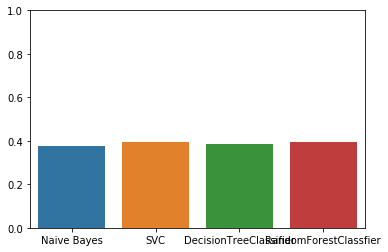

In [27]:
print('Model  Accuracy Using sidebar_color and link_color')
for name,accuracy in sorted(models_accuracy_colors.items(), key = lambda x:x[1], reverse = True):
    print('{0} : {1:.2f}%'.format(name,accuracy*100))
sns.barplot(list(models_accuracy_colors.keys()), list(models_accuracy_colors.values()))
plt.ylim(0,1)
